# Concrete Strength Prediction
Objective 

To predict the concrete strength using the data available in file "concrete.csv". Apply feature engineering and model tuning to obtain 85% to 95% accuracy.

## Steps and Tasks:

Exploratory Data Quality Report Reflecting the Following:
  –data types and description of the independent attributes which should include (name, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions/tails, missing values, outliers, duplicates(10 Marks)
Bi-variate analysis between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms, or density curves. (10 marks)
Feature Engineering techniques(10 marks)
Identify opportunities (if any) to extract new features from existing features, drop a feature(if required) Hint: Feature Extraction, for example, consider a dataset with two features length and breadth. From this, we can extract a new feature Area which would be length * breadth.
Get the data model ready and do a train test split.
Decide on the complexity of the model, should it be a simple linear model in terms of parameters or would a quadratic or higher degree.
 

## Creating the Model and Tuning It:
Algorithms that you think will be suitable for this project. Use Kfold Cross-Validation to evaluate model performance. Use appropriate metrics and make a DataFrame to compare models w.r.t their metrics. (at least 3 algorithms, one bagging and one boosting based algorithms have to be there). (15 marks)
Techniques employed to squeeze that extra performance out of the model without making it overfit. Use Grid Search or Random Search on any of the two models used above. Make a DataFrame to compare models after hyperparameter tuning and their metrics as above. (15 marks)
 

## Attribute Information:

Given are the variable name, variable type, the measurement unit, and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.

 

Name	Data Type	Measurement	Description
1.	Cement (cement)	quantitative	kg in a m3 mixture	Input Variable
2.	Blast Furnace Slag (slag)	quantitative	kg in a m3 mixture	Input Variable
3.	Fly Ash (ash)	quantitative	kg in a m3 mixture	Input Variable
4.	Water(water)	quantitative	kg in a m3 mixture	Input Variable
5.	Superplasticizer (superplastic)	quantitative	kg in a m3 mixture	Input Variable
6.	Coarse Aggregate (coarseagg)	quantitative	kg in a m3 mixture	Input Variable
7.	Fine Aggregate (fineagg)	quantitative	kg in a m3 mixture	Input Variable
8.	Age(age)	quantitative	Day (1~365)	Input Variable
9.	Concrete compressive strength(strength)	quantitative	MPa	Output Variable


# Univariate Analysis 

### 1. Import Pandas, Numpy, pyplot and seaborn

In [1]:
#Import necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")  

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, LeaveOneOut
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, recall_score,classification_report, precision_score, f1_score,roc_auc_score,accuracy_score, roc_curve, cohen_kappa_score
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
from sklearn.pipeline import Pipeline 
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

### 2. Import the dataframes 


In [2]:
df = pd.read_csv("concrete.csv")  # Read the data regarding customer attributes


Dataframe analysis

In [3]:
print(df.shape)
df.head()  # the combined dataframe

(1030, 9)


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


### 4. Print the number of missing values in each of the columns

In [4]:
df.isna().sum() 

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [6]:
print('*******************Dataset Info*************************')
print(df.info())
print('*******************DataSet Shape************************')
print(df.shape)
print('*********************Describe***************************')
print(df.describe())
print('******************Number of nulls***********************')
print(df.isnull().sum())
print('********************************************************')

*******************Dataset Info*************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB
None
*******************DataSet Shape************************
(1030, 9)
*********************Describe***************************
            cement         slag          ash        water  superplastic  \
count  1030.000000  1030.000000  1030.000000  1030.000000   1030.000000   
mean    281.167864    73.895825   

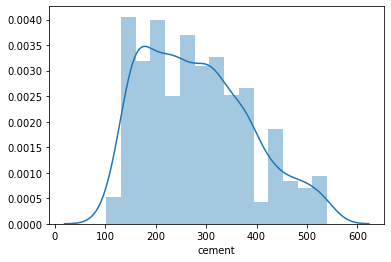

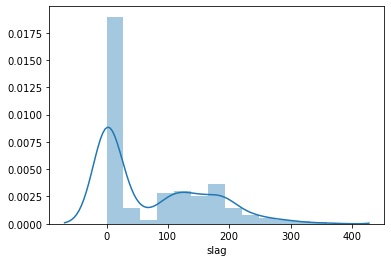

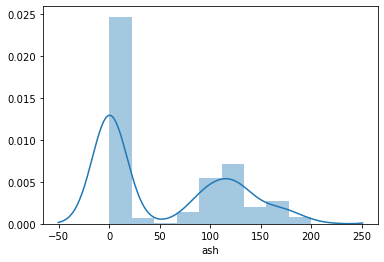

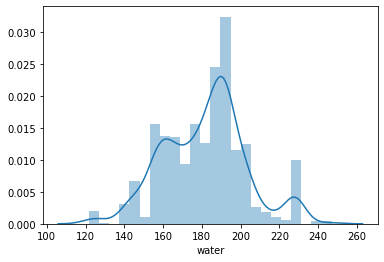

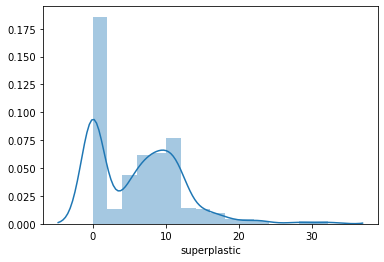

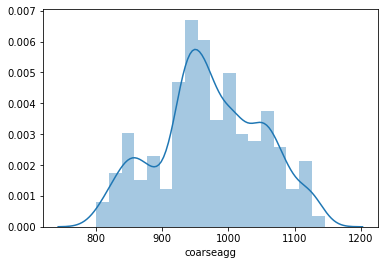

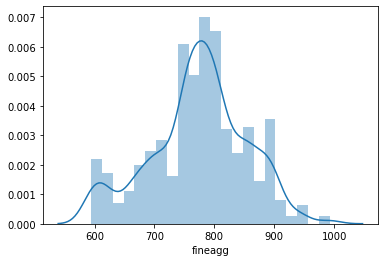

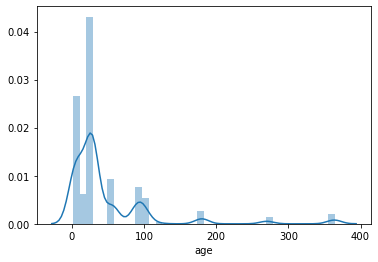

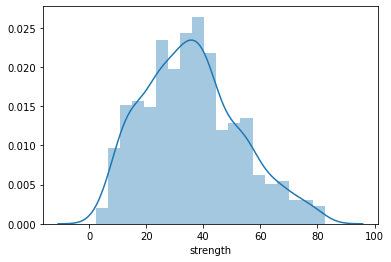

In [7]:
# distplot for continous columns
for i in ['cement','slag','ash','water','superplastic','coarseagg','fineagg','age','strength']:
    sns.distplot(df[i])
    plt.show()

In [8]:
df.skew()

cement          0.509481
slag            0.800717
ash             0.537354
water           0.074628
superplastic    0.907203
coarseagg      -0.040220
fineagg        -0.253010
age             3.269177
strength        0.416977
dtype: float64

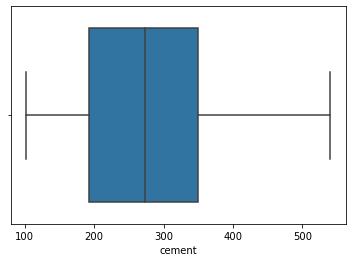

In [9]:
sns.boxplot(df['cement'])
plt.show()

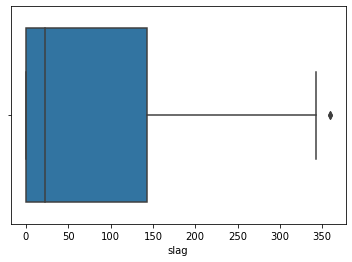

In [10]:
sns.boxplot(df['slag'])
plt.show()

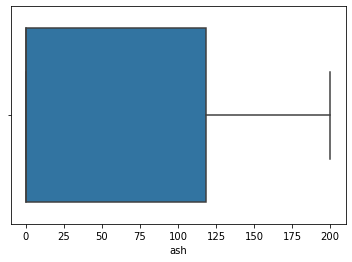

In [11]:
sns.boxplot(df['ash'])
plt.show()

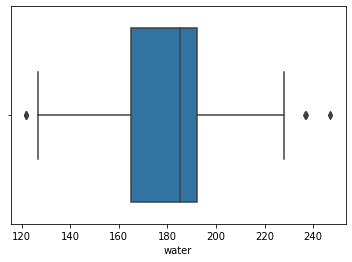

In [12]:
sns.boxplot(df['water'])
plt.show()

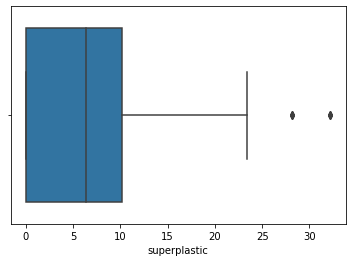

In [13]:
sns.boxplot(df['superplastic'])
plt.show()

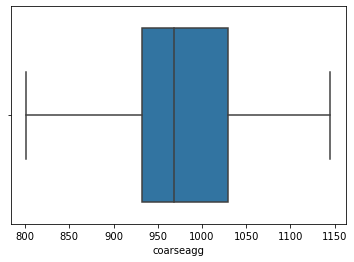

In [14]:
sns.boxplot(df['coarseagg'])
plt.show()

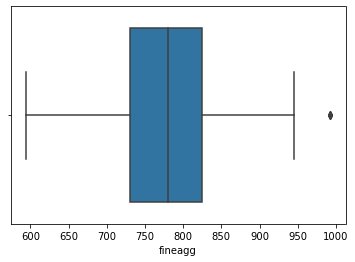

In [15]:
sns.boxplot(df['fineagg'])
plt.show()

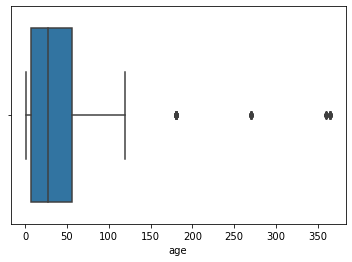

In [16]:
sns.boxplot(df['age'])
plt.show()

# Bivariate  Analysis

*  Print correlation

In [17]:
cor = df.corr() # It will show correlation of only numerical variables here.

In [18]:
cor

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


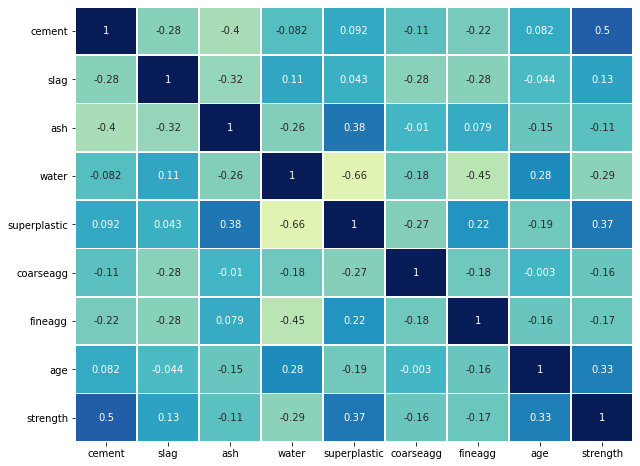

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

* No major correlations except  superplastic and water which is 66% 

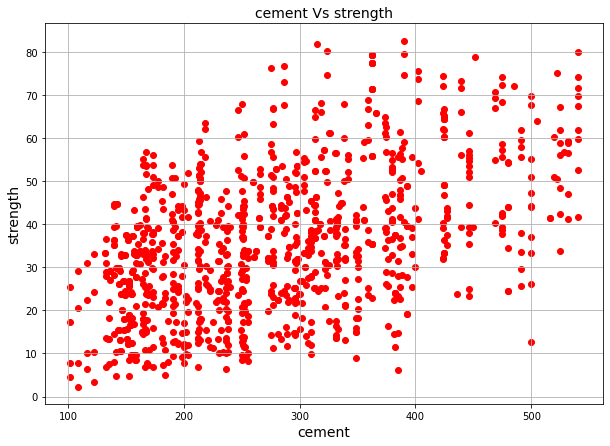

In [20]:
plt.figure(figsize=(10,7))
plt.scatter(df['cement'], df['strength'], color='red')
plt.title('cement Vs strength', fontsize=14)
plt.xlabel('cement', fontsize=14)
plt.ylabel('strength', fontsize=14)
plt.grid(True)
plt.show()

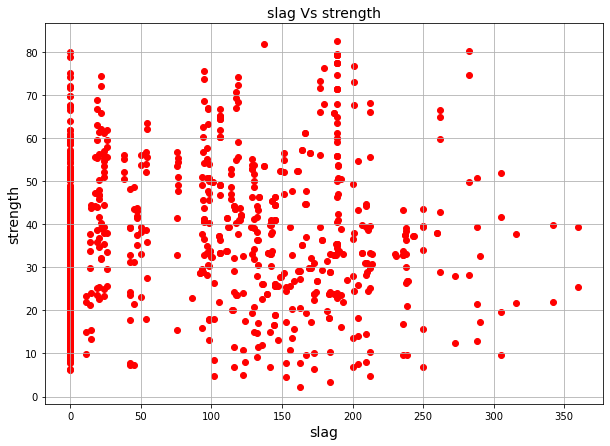

In [21]:
plt.figure(figsize=(10,7))
plt.scatter(df['slag'], df['strength'], color='red')
plt.title('slag Vs strength', fontsize=14)
plt.xlabel('slag', fontsize=14)
plt.ylabel('strength', fontsize=14)
plt.grid(True)
plt.show()

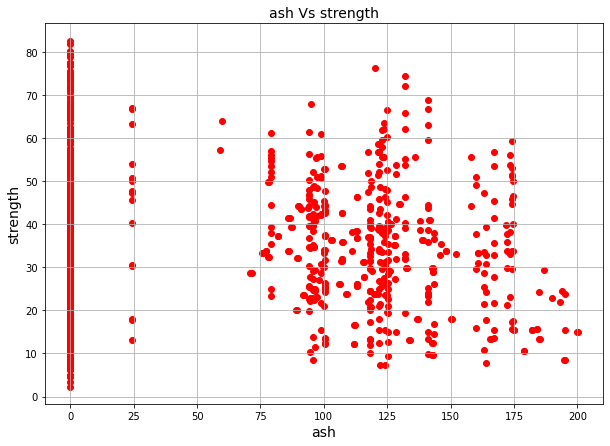

In [22]:
plt.figure(figsize=(10,7))
plt.scatter(df['ash'], df['strength'], color='red')
plt.title('ash Vs strength', fontsize=14)
plt.xlabel('ash', fontsize=14)
plt.ylabel('strength', fontsize=14)
plt.grid(True)
plt.show()

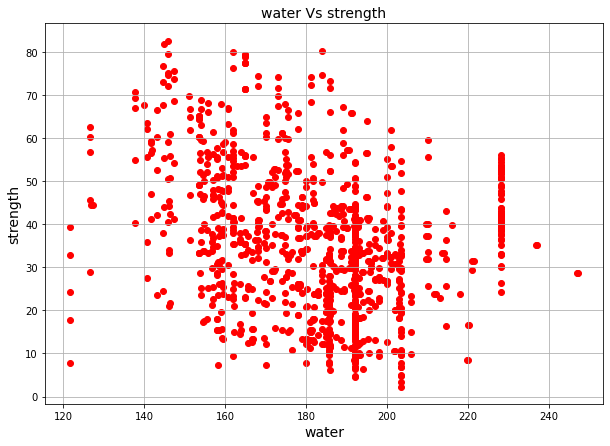

In [23]:
plt.figure(figsize=(10,7))
plt.scatter(df['water'], df['strength'], color='red')
plt.title('water Vs strength', fontsize=14)
plt.xlabel('water', fontsize=14)
plt.ylabel('strength', fontsize=14)
plt.grid(True)
plt.show()

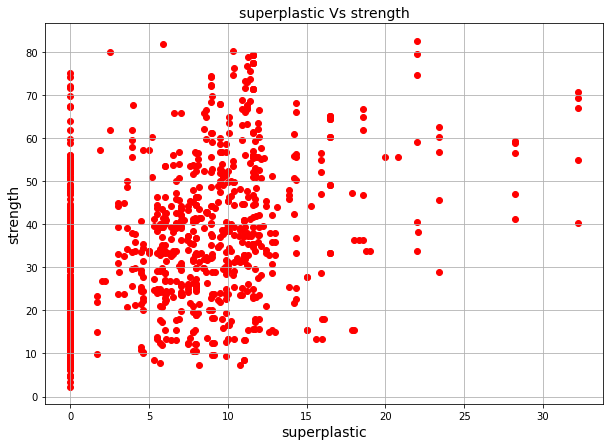

In [24]:
plt.figure(figsize=(10,7))
plt.scatter(df['superplastic'], df['strength'], color='red')
plt.title('superplastic Vs strength', fontsize=14)
plt.xlabel('superplastic', fontsize=14)
plt.ylabel('strength', fontsize=14)
plt.grid(True)
plt.show()

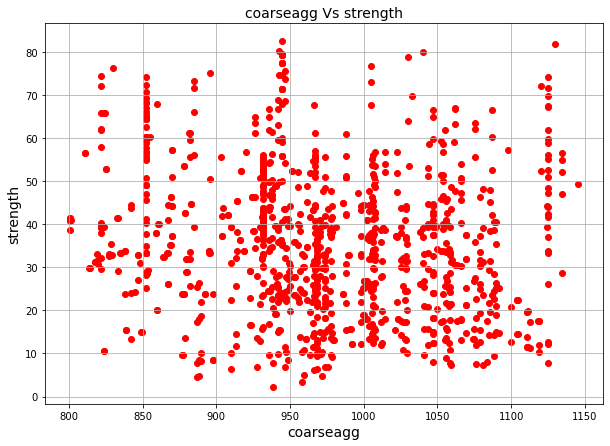

In [25]:
plt.figure(figsize=(10,7))
plt.scatter(df['coarseagg'], df['strength'], color='red')
plt.title('coarseagg Vs strength', fontsize=14)
plt.xlabel('coarseagg', fontsize=14)
plt.ylabel('strength', fontsize=14)
plt.grid(True)
plt.show()

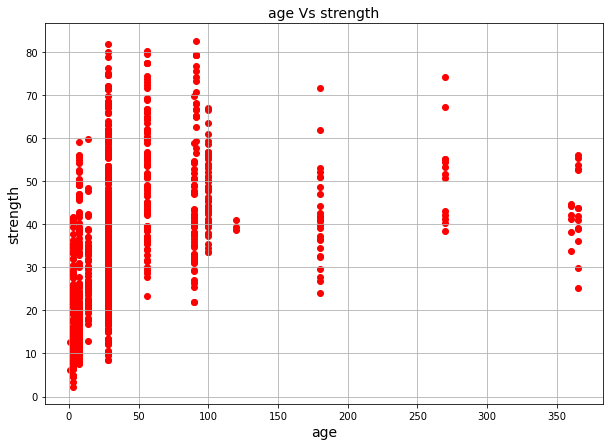

In [26]:
plt.figure(figsize=(10,7))
plt.scatter(df['age'], df['strength'], color='red')
plt.title('age Vs strength', fontsize=14)
plt.xlabel('age', fontsize=14)
plt.ylabel('strength', fontsize=14)
plt.grid(True)
plt.show()

** Observationa



## Feature Engineering techniques

In [27]:
# creating an alternate dataframe where we will do feature engineering and prepare the data 

#dfmod = df.drop('superplastic', axis =1 ) 
dfmod = df

In [28]:
# log transforming age as it was highly skewed data 

dfmod['age'] = np.log1p(df['age'])



In [29]:
# Ash , slag and superplastic has too many values as zero , modifying and replacing zero by mean

dfmod.loc[ dfmod['ash'] == 0 ,'ash' ] = dfmod['ash'].mean()


In [30]:
dfmod.loc[ dfmod['superplastic'] == 0 ,'superplastic' ] = dfmod['superplastic'].mean()

In [31]:
dfmod.loc[ dfmod['slag'] == 0 ,'slag' ] = dfmod['slag'].mean()

## Train and test split

In [32]:
y = dfmod['strength']
X = dfmod.loc[:, dfmod.columns != 'strength']
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=25,)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((721, 8), (309, 8), (721,), (309,))

Running a simple linear regression in multiple polynomial degrees

In [33]:
from sklearn.linear_model import LinearRegression
linearregression = LinearRegression()                                    
lrm = linearregression.fit(X_train, y_train)                                  

print("Intercept of the linear equation:", linearregression.intercept_) 
print("\nCOefficients of the equation are:", linearregression.coef_)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pred = linearregression.predict(X_test)         

Intercept of the linear equation: 153.59581624021152

COefficients of the equation are: [ 7.24981826e-02  5.17703090e-02  1.06608998e-03 -4.72207771e-01
 -4.32945410e-01 -4.97543224e-02 -4.66001793e-02  9.24410548e+00]


In [34]:
# Mean Absolute Error
mean_absolute_error(y_test, pred)

5.584688951733037

In [35]:
# RMSE
mean_squared_error(y_test, pred)**0.5

7.269951643268878

In [36]:
# R2 Squared:
r2_score(y_test, pred)

0.7940820761175647

In [37]:
# Training Score
linearregression.score(X_train, y_train)

0.7799049335782553

In [38]:
# Testing score
linearregression.score(X_test, y_test)

0.7940820761175647

## Using Polynomial function in linear regression with degree 2 and degree 3

In [39]:
from sklearn.preprocessing import PolynomialFeatures 
poly = PolynomialFeatures( degree = 2, include_bias = False) 
xPoly_train = poly.fit_transform(X_train)
xPoly_train[0:2]

array([[2.03500000e+02, 3.05300000e+02, 5.41883495e+01, 2.03500000e+02,
        6.20466019e+00, 9.63400000e+02, 6.30000000e+02, 2.07944154e+00,
        4.14122500e+04, 6.21285500e+04, 1.10273291e+04, 4.14122500e+04,
        1.26264835e+03, 1.96051900e+05, 1.28205000e+05, 4.23166354e+02,
        9.32080900e+04, 1.65437031e+04, 6.21285500e+04, 1.89428276e+03,
        2.94126020e+05, 1.92339000e+05, 6.34853503e+02, 2.93637722e+03,
        1.10273291e+04, 3.36220295e+02, 5.22050559e+04, 3.41386602e+04,
        1.12681505e+02, 4.14122500e+04, 1.26264835e+03, 1.96051900e+05,
        1.28205000e+05, 4.23166354e+02, 3.84978081e+01, 5.97756963e+03,
        3.90893592e+03, 1.29022282e+01, 9.28139560e+05, 6.06942000e+05,
        2.00333398e+03, 3.96900000e+05, 1.31004817e+03, 4.32407713e+00],
       [2.86300000e+02, 2.00900000e+02, 5.41883495e+01, 1.44700000e+02,
        1.12000000e+01, 1.00460000e+03, 8.03700000e+02, 3.36729583e+00,
        8.19676900e+04, 5.75176700e+04, 1.55141245e+04, 4.14276

In [40]:
regression_modelP2 = linearregression.fit(xPoly_train, y_train)

In [41]:
print(regression_modelP2.score(xPoly_train, y_train))

0.8655724648227583


In [42]:
poly = PolynomialFeatures( degree = 3, include_bias = False) 
xPoly_train = poly.fit_transform(X_train)
regression_modelPnew = linearregression.fit(xPoly_train, y_train)
# Train R^2
print(regression_modelPnew.score(xPoly_train, y_train))

0.9478233882599996


#### Feature selection using Lasso regression 

In [43]:
def pretty_print_linear(coefs, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)

In [44]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=.3)
lasso.fit(X, y)
names = ['cement','slag','ash','water','superplastic','coarseagg','fineagg','age']
print ("Lasso model: ", pretty_print_linear(lasso.coef_, names, sort = True))

Lasso model:  8.95 * age + -0.455 * water + -0.349 * superplastic + 0.071 * cement + -0.05 * fineagg + 0.05 * slag + -0.049 * coarseagg + 0.0 * ash


#### As per Lasso analysis  zero coefficient for ash so it can be dropped 

In [45]:
dfmod = dfmod.drop('ash', axis =1 ) 

# #Creating the Model and Tuning It:

##### Apply DecisionTreeRegressor Algorithm and print the accuracy.


In [46]:
from sklearn.tree import DecisionTreeRegressor


dt = DecisionTreeRegressor()

dt.fit(X_train, y_train)

score3 = dt.score(X_test, y_test)

print(f"Decision tree acccuracy score: {score3}")

Decision tree acccuracy score: 0.8020634357428731


### Apply RandomForestRegressor Algorithm and print the accuracy.


In [47]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(X_train, y_train)

score4 = rf.score(X_test, y_test)

print(f'Random Forest accuracy score = {score4}')

Random Forest accuracy score = 0.8933158092963223


### Apply Bagging Regressor Algorithm and print the accuracy.


In [48]:
from sklearn.ensemble import BaggingRegressor

bgcl = BaggingRegressor(n_estimators = 50, max_samples = 0.7, bootstrap=True, oob_score=True, random_state=100)
bgcl = bgcl.fit(X_train, y_train)

In [49]:
bgcl.score(X_train, y_train) ## training accuracy

0.9731782520395995

In [52]:
score5 = bgcl.score(X_test, y_test) ## test accuracy
score5

0.8953192929633571

### Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [53]:
from sklearn.ensemble import GradientBoostingRegressor
gbcl = GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.1, random_state=100)
gbcl = gbcl.fit(X_train, y_train)

In [54]:
gbcl.score(X_train, y_train)

0.9482436278231264

In [61]:
score6 = gbcl.score(X_test, y_test)
score6

0.8931977465035543

### Apply XGBOOst Classifier Algorithm for the same data and print the accuracy

In [62]:
import xgboost
xgb_reg = xgboost.XGBRegressor(max_depth=3)
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [63]:
xgb_reg.score(X_train, y_train)

0.9766300139217331

In [64]:
score7 = xgb_reg.score(X_test, y_test)
score7

0.9079414593184794

# K-fold cross-validation

k-fold cross validation( without stratification)

Usually k is set as 10-20 in practical settings, depends on data set size

In [65]:
kfold = KFold(n_splits=10, random_state=25)

In [67]:
results = cross_val_score(dt,X, y, cv=kfold)
kfoldscore3 = np.mean(abs(results))
kfoldscore3

0.8653308323031036

In [68]:
results = cross_val_score(rf,X, y, cv=kfold)
kfoldscore4 =np.mean(abs(results))
kfoldscore4

0.9147850145383888

In [69]:
results = cross_val_score(bgcl,X, y, cv=kfold)
kfoldscore5 =np.mean(abs(results))
kfoldscore5

0.9056833959372085

In [70]:
results = cross_val_score(gbcl,X, y, cv=kfold)
kfoldscore6 =np.mean(abs(results))
kfoldscore6

0.8972756780772398

In [71]:
results = cross_val_score(xgb_reg,X, y, cv=kfold)
kfoldscore7 =np.mean(abs(results))
kfoldscore7

0.9295041313196906

## Model Tuning

from sklearn.model_selection import cross_val_score
#For Decision Tree dt
score5 = cross_val_score(dt, X, y, cv = 10).mean()
print(f'Cross validation score of Decision tree = {score5}')

#Random Forest rf
score6 = cross_val_score(rf, X, y, cv = 10).mean()
print(f'Cross validation score of Random forest = {score6}')

### Parameter Tuning Using GridDSearch



In [72]:
from sklearn.model_selection import GridSearchCV

parameters = {'bootstrap': [True],
 'max_depth': [10, 20, 30, 40, 50],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 8],
 'n_estimators': [100]}


clf = GridSearchCV(RandomForestRegressor(), parameters, cv = 5, verbose = 2, n_jobs= 4)
clf.fit(X, y)

clf.best_params_





Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    2.9s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    9.6s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:   11.9s finished


{'bootstrap': True,
 'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [73]:
rf = RandomForestRegressor(bootstrap= True,
 max_depth= 40,
 max_features= 'auto',
 min_samples_leaf= 1,
 n_estimators= 100)


scorehypertuned4 = cross_val_score(rf, X, y, cv = 5).mean()


scorehypertuned4
    

0.9029849759246622

In [74]:
parameters = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }

clf = GridSearchCV(DecisionTreeRegressor(), parameters, cv = 5, verbose = 2, n_jobs= 4)
clf.fit(X, y)

clf.best_params_


Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 810 out of 810 | elapsed:    3.1s finished


{'criterion': 'mse',
 'max_depth': 8,
 'max_leaf_nodes': 100,
 'min_samples_leaf': 20,
 'min_samples_split': 10}

In [75]:
dtm = DecisionTreeRegressor(criterion = 'mse',max_depth=8,
                           min_samples_split=10,min_samples_leaf=20,
                           max_leaf_nodes=100)

In [76]:

scorehypertuned3 = cross_val_score(dtm, X, y, cv = 5).mean()


scorehypertuned3

0.7466932271535744

In [77]:
params_bag = {"n_estimators": [50,100,200],
              "max_features":[1,2,4,6,8],
              "max_samples": [0.5,0.1],
            "bootstrap": [True, False],
         "bootstrap_features": [True, False]}
bgf = GridSearchCV(BaggingRegressor(), params_bag, cv = 5, verbose = 2, n_jobs= 4)
bgf.fit(X, y)

bgf.best_params_

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  58 tasks      | elapsed:    2.7s
[Parallel(n_jobs=4)]: Done 300 tasks      | elapsed:   16.7s
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:   35.9s finished


{'bootstrap': False,
 'bootstrap_features': False,
 'max_features': 8,
 'max_samples': 0.5,
 'n_estimators': 200}

In [78]:
bgr = BaggingRegressor(bootstrap_features = False,bootstrap=False,
                           max_features= 8,max_samples = 0.5,
                           n_estimators=200)

scorehypertuned5 = cross_val_score(bgr, X, y, cv = 5).mean()


scorehypertuned5

0.8979523599221302

In [79]:
from sklearn.model_selection import GridSearchCV


params_GR_BOOST = {"max_depth": [3,5,6,7],
              "max_features":['auto', 'sqrt', 'log2'],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
            'learning_rate':[0.05,0.1,0.2],
            'n_estimators': [10,30,50,70]}
gbdl = GridSearchCV(GradientBoostingRegressor(), param_grid=params_GR_BOOST)
gbdl.fit(X, y)

gbdl.best_params_

{'learning_rate': 0.2,
 'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 70}

In [80]:
gbr = GradientBoostingRegressor(learning_rate = 0.2,max_depth=6,
                           max_features='sqrt',min_samples_split=2,min_samples_leaf = 3,
                           n_estimators=70)

scorehypertuned6 = cross_val_score(gbr, X, y, cv = 5).mean()


scorehypertuned6

0.9210800333935772

In [81]:

parameters = {"colsample_bylevel":[0,0.25,0.5,1],
             "colsample_bynode":[0, 0.25, 0.5,1], "colsample_bytree": [0, 0.25, 0.5,1],
             "learning_rate":[0.3, 0.4, 0.5,0.6],"max_depth": [2,3,5,7]
              }

clf = GridSearchCV(xgboost.XGBRegressor(), parameters, cv = 5, verbose = 2, n_jobs= 4)
clf.fit(X, y)

clf.best_params_

Fitting 5 folds for each of 1024 candidates, totalling 5120 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  44 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 984 tasks      | elapsed:   12.2s
[Parallel(n_jobs=4)]: Done 2608 tasks      | elapsed:   38.0s
[Parallel(n_jobs=4)]: Done 4872 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 5120 out of 5120 | elapsed:  1.2min finished


{'colsample_bylevel': 0.5,
 'colsample_bynode': 0,
 'colsample_bytree': 1,
 'learning_rate': 0.3,
 'max_depth': 7}

In [82]:
XGB = xgboost.XGBRegressor(learning_rate= 0.3, max_depth= 5)

In [83]:
scorehypertuned7 = cross_val_score(XGB, X, y, cv = 5).mean()


scorehypertuned7

0.9252677954033764

In [84]:
resultsDf = pd.DataFrame({'Method':['DecisionTreeRegressor'], 'score': score3,'kfoldscore': kfoldscore3,'Hypertunedsscore': scorehypertuned3})
resultsDf = resultsDf[['Method', 'score','kfoldscore','Hypertunedsscore']]
resultsDf

,Method,score,kfoldscore,Hypertunedsscore
0,DecisionTreeRegressor,0.802063,0.865331,0.746693


In [85]:
tempResultsDf = pd.DataFrame({'Method':['RandomForestRegressor'], 'score': score4,'kfoldscore': kfoldscore4,'Hypertunedsscore': scorehypertuned4})
resultsDf=pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'score','kfoldscore','Hypertunedsscore']]
resultsDf

,Method,score,kfoldscore,Hypertunedsscore
0,DecisionTreeRegressor,0.802063,0.865331,0.746693
0,RandomForestRegressor,0.893316,0.914785,0.902985


In [86]:
tempResultsDf = pd.DataFrame({'Method':['BaggingRegressor'], 'score': score5,'kfoldscore': kfoldscore5,'Hypertunedsscore': scorehypertuned5})
resultsDf=pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'score','kfoldscore','Hypertunedsscore']]
resultsDf

,Method,score,kfoldscore,Hypertunedsscore
0,DecisionTreeRegressor,0.802063,0.865331,0.746693
0,RandomForestRegressor,0.893316,0.914785,0.902985
0,BaggingRegressor,0.895319,0.905683,0.897952


In [87]:
tempResultsDf = pd.DataFrame({'Method':['GradientboostRegressor'], 'score': score6,'kfoldscore': kfoldscore6,'Hypertunedsscore': scorehypertuned6})
resultsDf=pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'score','kfoldscore','Hypertunedsscore']]
resultsDf

,Method,score,kfoldscore,Hypertunedsscore
0,DecisionTreeRegressor,0.802063,0.865331,0.746693
0,RandomForestRegressor,0.893316,0.914785,0.902985
0,BaggingRegressor,0.895319,0.905683,0.897952
0,GradientboostRegressor,0.893198,0.897276,0.921080


In [88]:
tempResultsDf = pd.DataFrame({'Method':['XGBoostRegressor'], 'score': score7,'kfoldscore': kfoldscore7,'Hypertunedsscore': scorehypertuned7})
resultsDf=pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'score','kfoldscore','Hypertunedsscore']]
resultsDf

,Method,score,kfoldscore,Hypertunedsscore
0,DecisionTreeRegressor,0.802063,0.865331,0.746693
0,RandomForestRegressor,0.893316,0.914785,0.902985
0,BaggingRegressor,0.895319,0.905683,0.897952
0,GradientboostRegressor,0.893198,0.897276,0.921080
0,XGBoostRegressor,0.907941,0.929504,0.925268


# Conclusion:

- As per requirement with Hyper parameter tuning we are able to get a accuracy score of upto 92.5% using Gradient boost regressor and XG boost Regressor 

